<a href="https://colab.research.google.com/github/Digitalinnstudio/python_eda_sales/blob/main/sales_data_eda_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_excel('/content/fact_sales.xlsx')

In [6]:
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,2011-01-01,2011-01-06,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,2011-01-01,2011-01-05,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,2011-01-01,2011-01-05,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,2011-01-01,2011-01-08,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,2011


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  datetime64[ns]
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  float64       
 15  qu

In [10]:
df.shape

(51290, 21)

In [11]:
df.isnull().sum()

,0
order_id,0
order_date,0
ship_date,0
ship_mode,0
customer_name,0
segment,0
state,0
country,0
market,0
region,0


In [12]:
df.describe()

,order_date,ship_date,sales,quantity,discount,profit,shipping_cost,year
count,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000,51290.000000
mean,2013-05-11 21:26:49.155780864,2013-05-15 20:42:42.745174528,246.490581,3.476545,0.142908,28.641740,26.375818,2012.777208
min,2011-01-01 00:00:00,2011-01-03 00:00:00,0.444000,1.000000,0.000000,-6599.978000,0.002000,2011.000000
25%,2012-06-19 00:00:00,2012-06-23 00:00:00,30.758625,2.000000,0.000000,0.000000,2.610000,2012.000000
50%,2013-07-08 00:00:00,2013-07-12 00:00:00,85.053000,3.000000,0.000000,9.240000,7.790000,2013.000000
75%,2014-05-22 00:00:00,2014-05-26 00:00:00,251.053200,5.000000,0.200000,36.810000,24.450000,2014.000000
max,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,0.850000,8399.976000,933.570000,2014.000000
std,NaN,NaN,487.565361,2.278766,0.212280,174.424113,57.296810,1.098931


In [13]:
# Sales Trend
df['order_date'].min()

Timestamp('2011-01-01 00:00:00')

In [14]:
df['order_date'].max()

Timestamp('2014-12-31 00:00:00')

In [15]:
df['month_year'] = df['order_date'].apply(lambda x: x.strftime('%Y-%m'))

In [27]:
df_monthly = df.groupby('month_year')[['sales', 'discount', 'profit']].sum().reset_index()

In [29]:
df_monthly.head()

,month_year,sales,discount,profit
0,2011-01,98898.48886,68.758,8321.80096
1,2011-02,91152.15698,52.252,12417.90698
2,2011-03,145729.36736,74.212,15303.56826
3,2011-04,116915.76418,80.782,12902.32438
4,2011-05,146747.83610,82.382,12183.82870


Text(0.5, 1.0, 'Sales Trend')

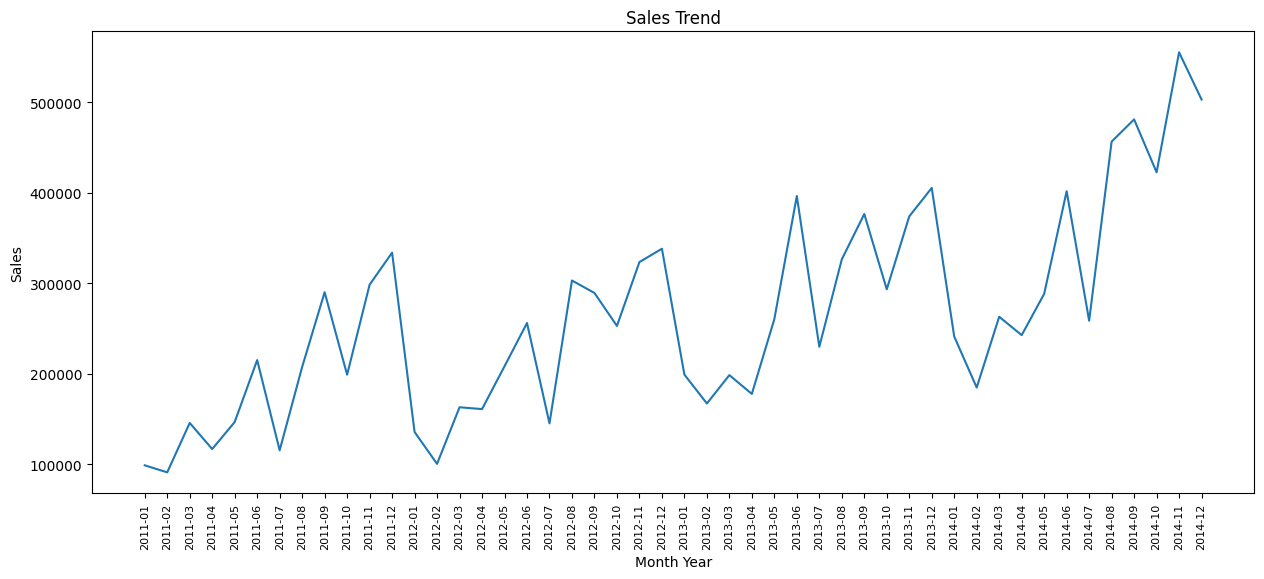

In [35]:
plt.figure(figsize=(15, 6))
plt.plot(df_monthly['month_year'], df_monthly['sales'])
plt.xticks(rotation='vertical', size=8)
plt.xlabel('Month Year')
plt.ylabel('Sales')
plt.title('Sales Trend')

Yearly trend Q1 sales drop, sales shows overall growth

  top 10 by sales

In [44]:
product_sales = df.groupby('product_name')['sales'].sum().sort_values(ascending=False)
product_sales.head(10)


,sales
product_name,
"Apple Smart Phone, Full Size",86935.7786
"Cisco Smart Phone, Full Size",76441.5306
"Motorola Smart Phone, Full Size",73156.3030
"Nokia Smart Phone, Full Size",71904.5555
Canon imageCLASS 2200 Advanced Copier,61599.8240
"Hon Executive Leather Armchair, Adjustable",58193.4841
"Office Star Executive Leather Armchair, Adjustable",50661.6840
"Harbour Creations Executive Leather Armchair, Adjustable",50121.5160
"Samsung Smart Phone, Cordless",48653.4600


products by quantity

In [46]:
product_quantity = df.groupby('product_name')['quantity'].sum().sort_values(ascending=False)
product_quantity.head(10)

,quantity
product_name,
Staples,876
"Cardinal Index Tab, Clear",337
"Eldon File Cart, Single Width",321
"Rogers File Cart, Single Width",262
"Sanford Pencil Sharpener, Water Color",259
"Stockwell Paper Clips, Assorted Sizes",253
"Avery Index Tab, Clear",252
"Ibico Index Tab, Clear",251
"Smead File Cart, Single Width",250


by profit

In [47]:
product_profit= df.groupby('product_name')['profit'].sum().sort_values(ascending=False)
product_profit.head(10)

,profit
product_name,
Canon imageCLASS 2200 Advanced Copier,25199.9280
"Cisco Smart Phone, Full Size",17238.5206
"Motorola Smart Phone, Full Size",17027.1130
"Hoover Stove, Red",11807.9690
"Sauder Classic Bookcase, Traditional",10672.0730
"Harbour Creations Executive Leather Armchair, Adjustable",10427.3260
"Nokia Smart Phone, Full Size",9938.1955
"Cisco Smart Phone, with Caller ID",9786.6408
"Nokia Smart Phone, with Caller ID",9465.3257


In [57]:
category_prof= df.groupby('category')['profit'].sum().sort_values(ascending=False)
category_prof.head(10)

,profit
category,
Technology,663778.73318
Office Supplies,518473.83430
Furniture,286782.25380


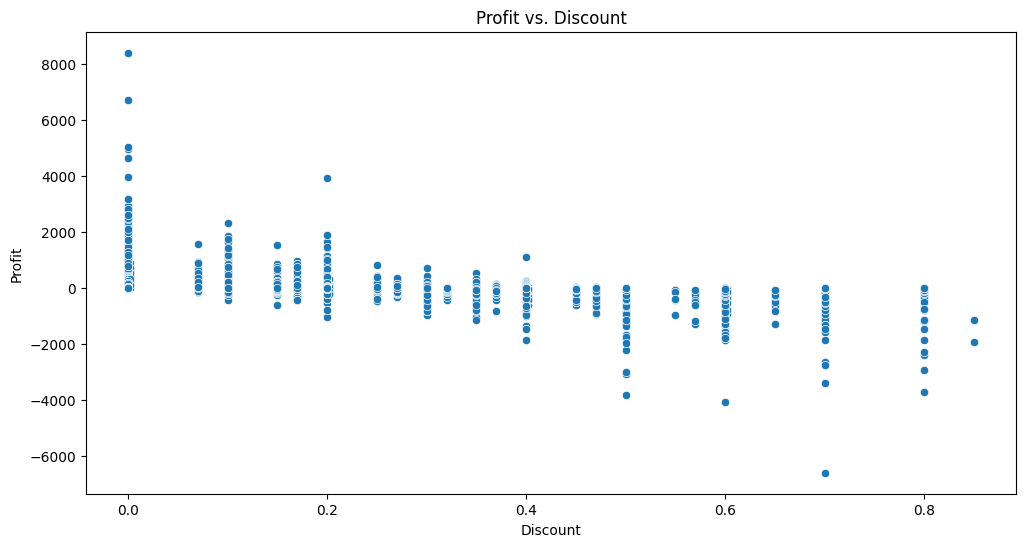

In [59]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='discount', y='profit', data=df)
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Profit vs. Discount')
plt.show()

In [63]:
average_sales_by_discount = df.groupby('discount')['sales'].mean().reset_index()
print(average_sales_by_discount.head())

   discount       sales
0     0.000  241.042813
1     0.002  567.018701
2     0.070  810.779022
3     0.100  388.300485
4     0.150  618.474630


In [64]:
average_profit_by_discount = df.groupby('discount')['profit'].mean().reset_index()
print(average_profit_by_discount.head())

   discount      profit
0     0.000   61.039514
1     0.002  125.762649
2     0.070  140.990022
3     0.100   64.071216
4     0.150   56.855240


In [65]:
discount_metrics = pd.merge(average_sales_by_discount, average_profit_by_discount, on='discount')
print(discount_metrics.head())

   discount       sales      profit
0     0.000  241.042813   61.039514
1     0.002  567.018701  125.762649
2     0.070  810.779022  140.990022
3     0.100  388.300485   64.071216
4     0.150  618.474630   56.855240


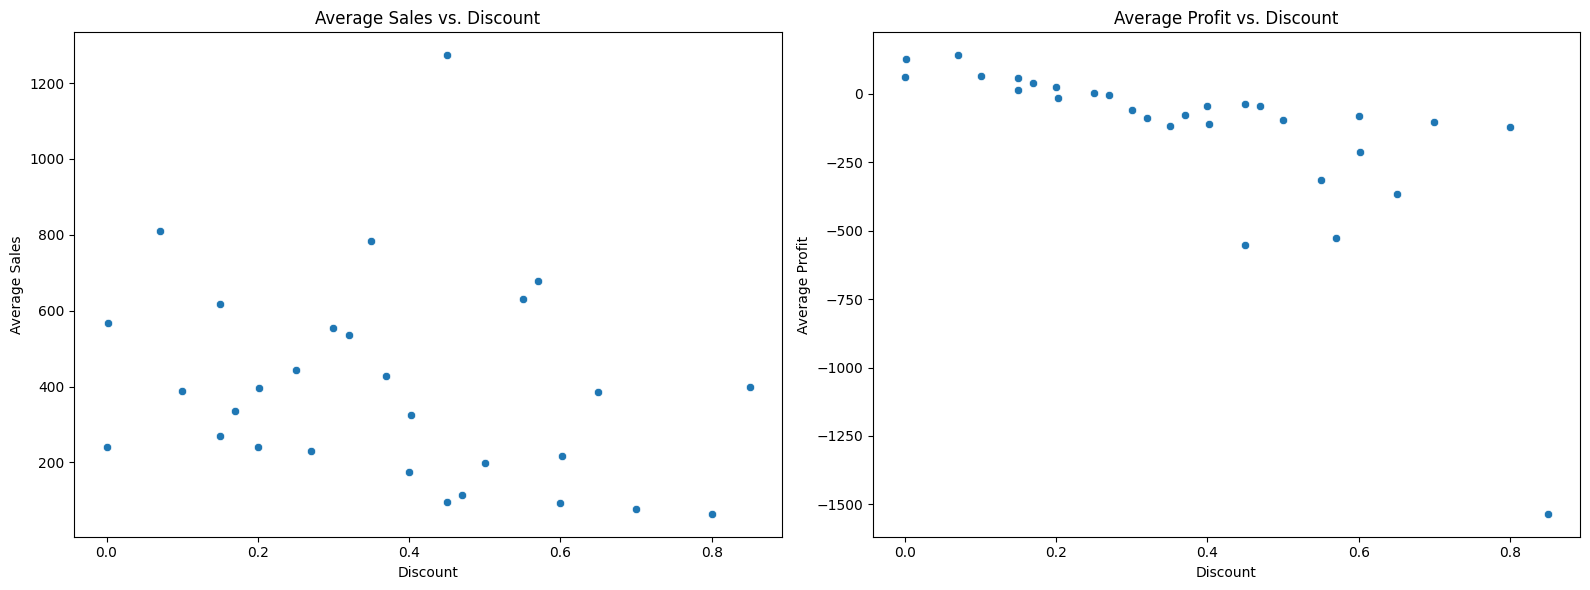

In [66]:
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
sns.scatterplot(x='discount', y='sales', data=discount_metrics)
plt.title('Average Sales vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Average Sales')

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
sns.scatterplot(x='discount', y='profit', data=discount_metrics)
plt.title('Average Profit vs. Discount')
plt.xlabel('Discount')
plt.ylabel('Average Profit')

plt.tight_layout()
plt.show()


In [67]:
top_10_sales = product_sales.head(10)
top_10_quantity = product_quantity.head(10)
top_10_profit = product_profit.head(10)

print("\nTop 10 Products by Sales:")
print(top_10_sales)
print("\nTop 10 Products by Quantity:")
print(top_10_quantity)
print("\nTop 10 Products by Profit:")
print(top_10_profit)


Top 10 Products by Sales:
product_name
Apple Smart Phone, Full Size                                86935.7786
Cisco Smart Phone, Full Size                                76441.5306
Motorola Smart Phone, Full Size                             73156.3030
Nokia Smart Phone, Full Size                                71904.5555
Canon imageCLASS 2200 Advanced Copier                       61599.8240
Hon Executive Leather Armchair, Adjustable                  58193.4841
Office Star Executive Leather Armchair, Adjustable          50661.6840
Harbour Creations Executive Leather Armchair, Adjustable    50121.5160
Samsung Smart Phone, Cordless                               48653.4600
Nokia Smart Phone, with Caller ID                           47877.7857
Name: sales, dtype: float64

Top 10 Products by Quantity:
product_name
Staples                                  876
Cardinal Index Tab, Clear                337
Eldon File Cart, Single Width            321
Rogers File Cart, Single Width           262